# 🧬 What Makes a Pokémon Strong?

This project analyzes the Pokémon dataset to explore which base stat traits are most associated with strong or legendary Pokémon. It investigates how attributes such as HP, Attack, Speed, and overall base totals differ across types and correlate with legendary status.

Using Python (pandas, seaborn, and scikit-learn), the notebook performs exploratory data analysis, statistical comparisons, and machine learning-based feature importance to uncover what defines a strong Pokémon from a statistical standpoint.

# 📦 1. Imports

In [47]:
import numpy as np
import pandas as pd
from google.colab import files
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 📥 2. Load Dataset


In [6]:
uploaded = files.upload()

Saving pokemon.csv to pokemon (1).csv


In [22]:
df = pd.read_csv('pokemon.csv')

In [23]:
pd.set_option('display.max_columns', None)
df.head(6)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0


# 🧼 3. Basic Cleaning

In [24]:
print("Missing values per column:\n", df.isnull().sum())

df.drop_duplicates(inplace=True)

stats_cols = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
df["base_total_check"] = df[stats_cols].sum(axis=1)

Missing values per column:
 abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             

# 📊 4. Base Stat Distributions

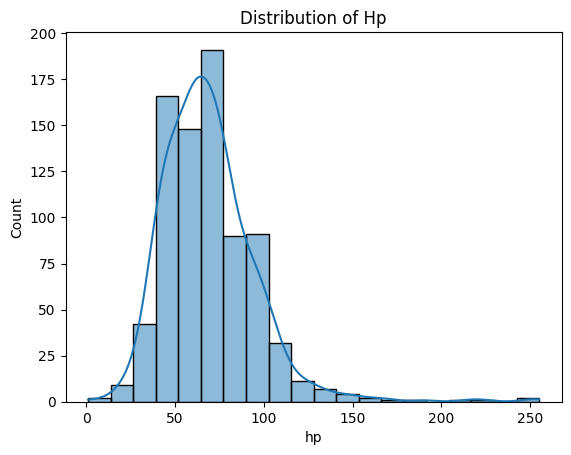

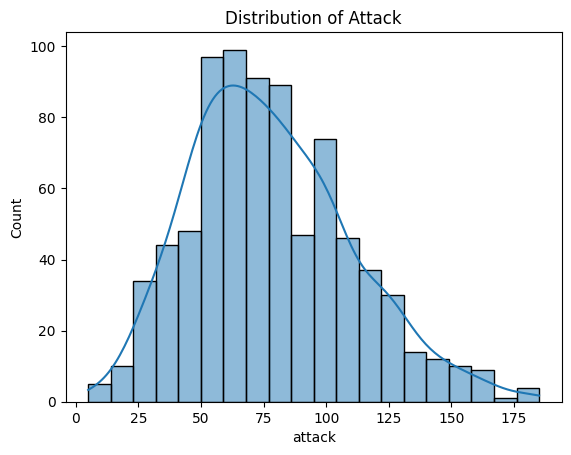

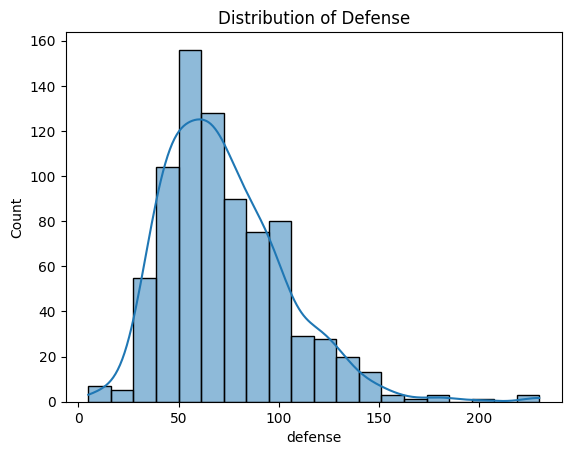

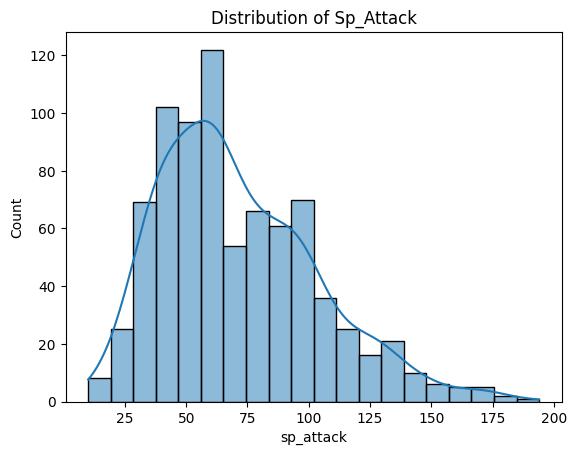

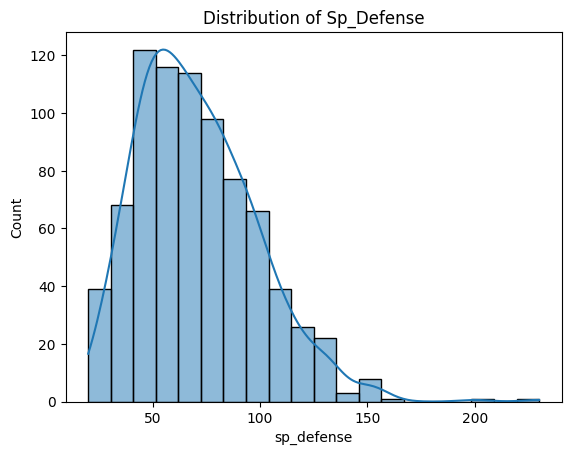

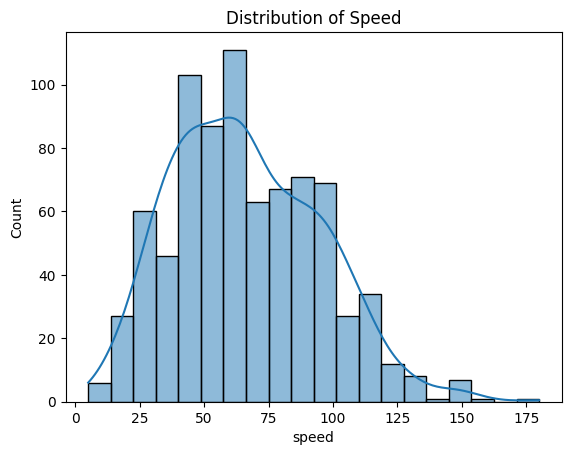

In [25]:
for stat in stats_cols:
    sns.histplot(df[stat], kde=True, bins=20)
    plt.title(f"Distribution of {stat.title()}")
    plt.xlabel(stat)
    plt.ylabel("Count")
    plt.show()

# 🔗 5. Correlation Between Stats

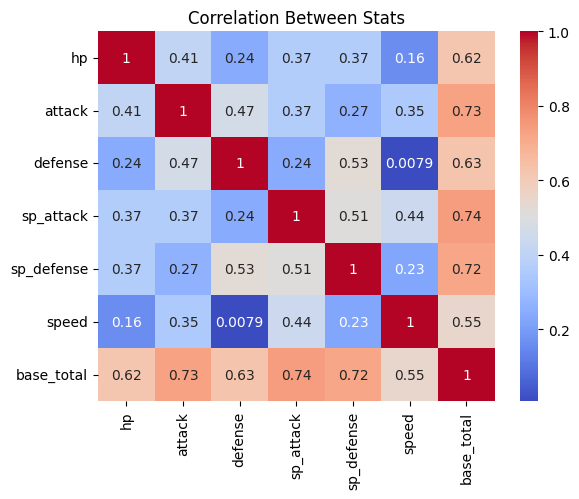

In [11]:
sns.heatmap(df[stats_cols + ['base_total']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Stats")
plt.show()

# 🏆 6. Top 10 Pokémon by Total Base Stats

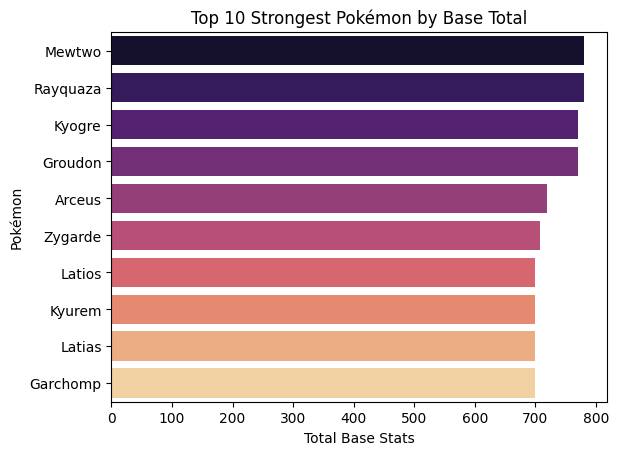

In [12]:
top10 = df.sort_values(by="base_total", ascending=False).head(10)
sns.barplot(data=top10, y="name", x="base_total", palette="magma", hue="name", legend=False)
plt.title("Top 10 Strongest Pokémon by Base Total")
plt.xlabel("Total Base Stats")
plt.ylabel("Pokémon")
plt.show()

# 🧠 7. Average Base Total by Primary Type

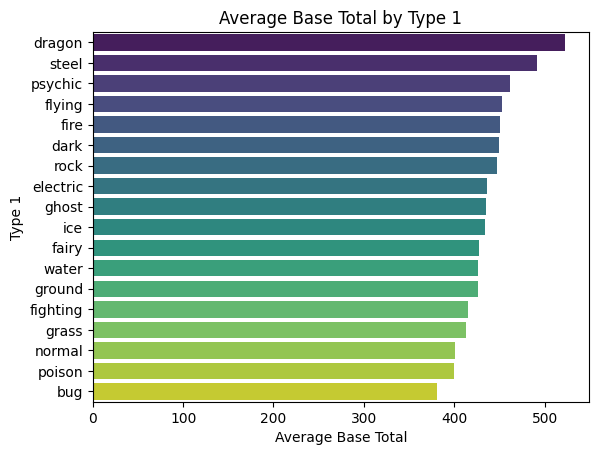

In [13]:
avg_by_type = df.groupby("type1")["base_total"].mean().sort_values(ascending=False)
sns.barplot(x=avg_by_type.values, y=avg_by_type.index, palette="viridis", hue=avg_by_type.index, legend=False)
plt.title("Average Base Total by Type 1")
plt.xlabel("Average Base Total")
plt.ylabel("Type 1")
plt.show()

# 🌟 8. Legendary vs Non-Legendary Comparison

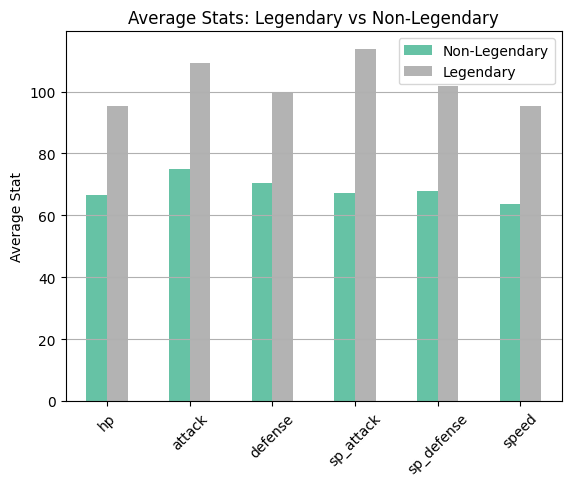

In [14]:
legendary_stats = df.groupby("is_legendary")[stats_cols].mean().T
legendary_stats.columns = ["Non-Legendary", "Legendary"]
legendary_stats.plot(kind="bar", colormap="Set2")
plt.title("Average Stats: Legendary vs Non-Legendary")
plt.ylabel("Average Stat")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# 🛡️ 9. Type Resistance: Mean Resistance to All Types

In [62]:
against_cols = [col for col in df.columns if col.startswith("against_")]
df["mean_resistance"] = df[against_cols].mean(axis=1)

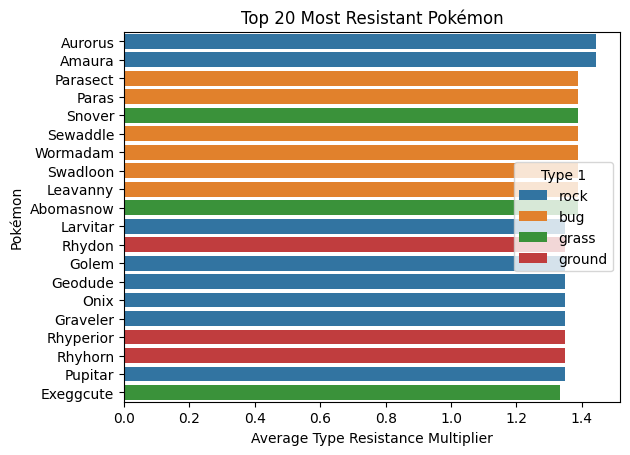

In [64]:
top20_defenders = df.sort_values("mean_resistance", ascending=False).head(20)
sns.barplot(data=top20_defenders, x="mean_resistance", y="name", hue="type1", dodge=False)
plt.title("Top 20 Most Resistant Pokémon")
plt.xlabel("Average Type Resistance Multiplier")
plt.ylabel("Pokémon")
plt.legend(title="Type 1")
plt.show()

#💥 10. Which Stats Are Most Predictive of Being Legendary?


This section explores which base stats most influence whether a Pokémon is classified as Legendary. We compare two techniques:

- 📈 **Correlation**: Measures linear relationships between each stat and `is_legendary`
- 🌲 **Random Forest Feature Importance**: A machine learning approach that captures nonlinear and joint effects

### 🔍 Correlation with `is_legendary`

This correlation matrix shows how strongly each numeric attribute is associated with being a legendary Pokémon (`is_legendary = 1`).

- Values close to **1** mean a strong **positive** relationship (higher stat → more likely legendary)
- Values close to **-1** mean a strong **negative** relationship
- Values near **0** mean little or no relationship

This gives a rough idea, but not necessarily feature importance in a model.

In [46]:
base_stats = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
correlations = df[base_stats + ["is_legendary"]].corr()["is_legendary"].drop("is_legendary").sort_values(ascending=False)
correlations

,is_legendary
sp_attack,0.406281
sp_defense,0.343241
speed,0.311639
hp,0.308405
attack,0.303295
defense,0.265587


###🤖 Random Forest Feature Importance:

This model-based metric shows how much each base stat contributed to the decision-making process when predicting whether a Pokémon is legendary (`is_legendary = 1`).

- **Higher values** indicate that the stat was more frequently used in decision tree splits and had a greater impact on reducing prediction uncertainty.
- Unlike correlation, this captures **nonlinear patterns** and **interactions between stats** (e.g., high Speed + high HP might matter together).
- Values are relative — a stat with importance `0.25` contributed more than one with `0.05`, but they don't have an absolute scale like correlation.

This approach provides a more realistic picture of which attributes actually influence the model’s prediction of legendary status.


In [49]:
X = df[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]]
y = df["is_legendary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
importance


,0
speed,0.208960
hp,0.205059
sp_attack,0.201237
sp_defense,0.140683
attack,0.125702
defense,0.118358


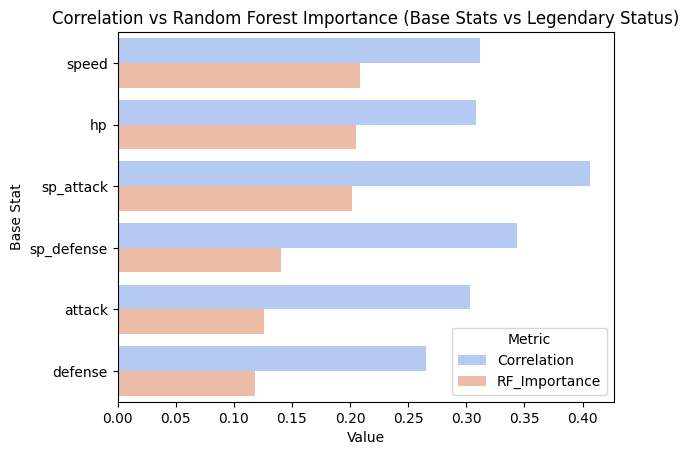

In [51]:
comparison_df = pd.DataFrame({
    "Correlation": correlations,
    "RF_Importance": importance
}).sort_values(by="RF_Importance", ascending=False)

comparison_df.reset_index(inplace=True)
comparison_df.rename(columns={"index": "Stat"}, inplace=True)

sns.barplot(data=comparison_df.melt(id_vars="Stat", var_name="Metric", value_name="Value"),
            x="Value", y="Stat", hue="Metric", palette="coolwarm")
plt.title("Correlation vs Random Forest Importance (Base Stats vs Legendary Status)")
plt.xlabel("Value")
plt.ylabel("Base Stat")
plt.show()

###🧠 Summary

- **Sp. Attack** and **HP** were among the most important stats for predicting whether a Pokémon is legendary.
- Correlation gives a rough idea, but Random Forest captures more complex, nonlinear patterns.
- This comparison shows that machine learning can reveal hidden patterns that simple statistics might miss.

#⚔️ 11. Which Types Excel in Each Stat?

###📊 Average stats by Primary Type

In [52]:
base_stats = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
avg_stats_by_type = df.groupby("type1")[base_stats].mean().sort_values(by="attack", ascending=False)
avg_stats_by_type

,hp,attack,defense,sp_attack,sp_defense,speed
type1,,,,,,
dragon,79.851852,106.407407,86.259259,89.592593,84.555556,76.111111
fighting,71.428571,99.178571,66.392857,50.107143,63.428571,64.285714
ground,73.187500,94.812500,83.906250,51.937500,62.281250,59.968750
steel,66.791667,93.083333,120.208333,72.708333,82.208333,56.583333
rock,66.333333,90.666667,96.266667,63.200000,73.377778,57.422222
dark,72.551724,87.793103,70.517241,74.517241,69.068966,75.310345
fire,68.730769,81.500000,67.788462,87.730769,71.538462,73.346154
normal,76.723810,75.161905,59.695238,56.980952,63.200000,69.533333
grass,65.358974,73.769231,70.871795,74.320513,69.230769,59.025641


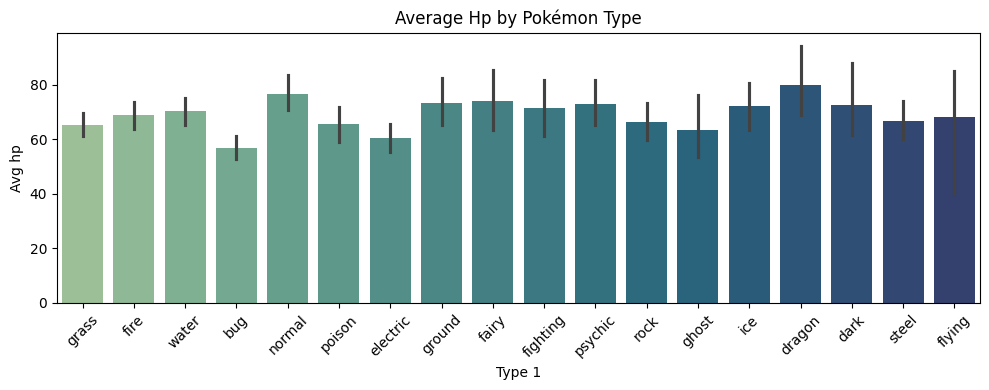

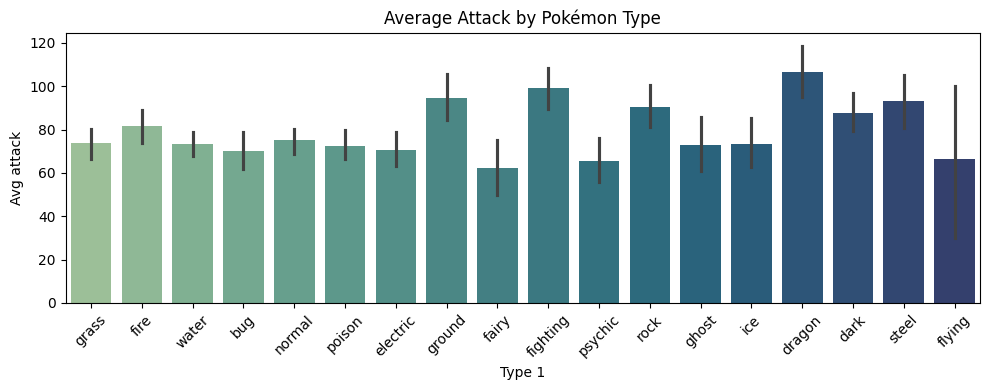

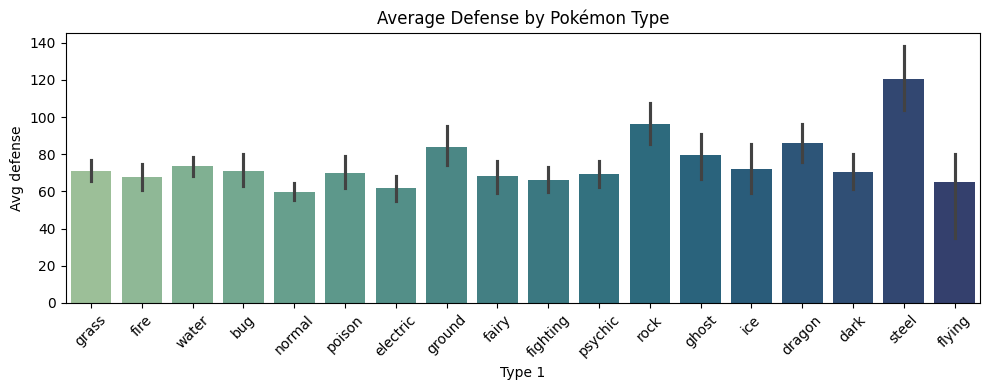

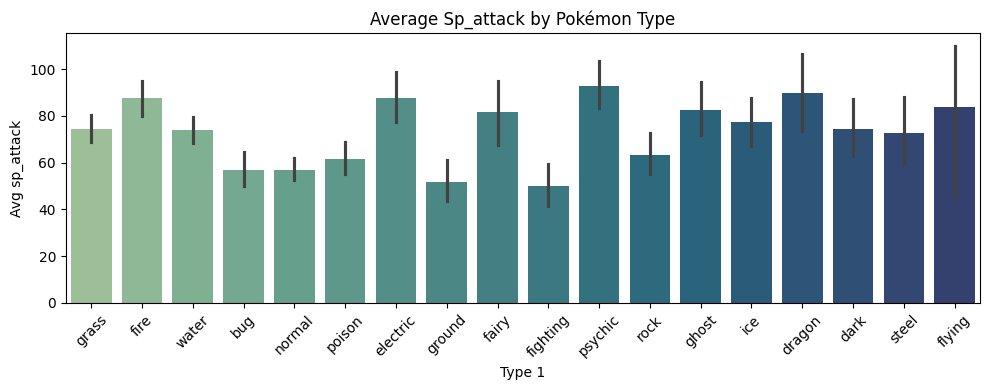

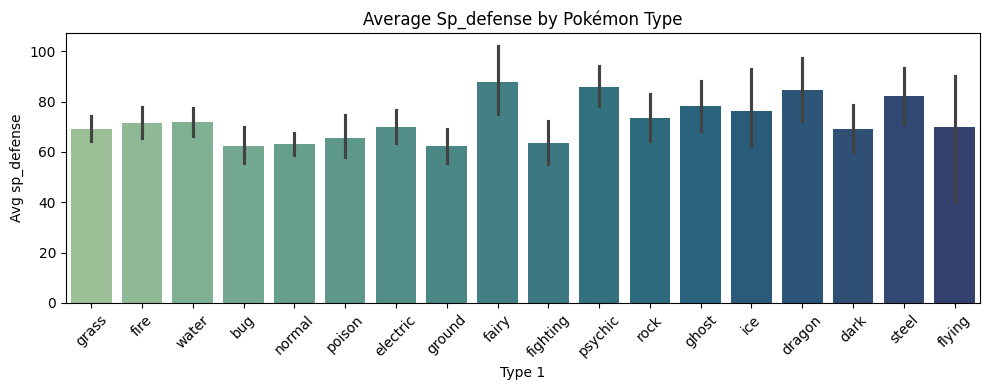

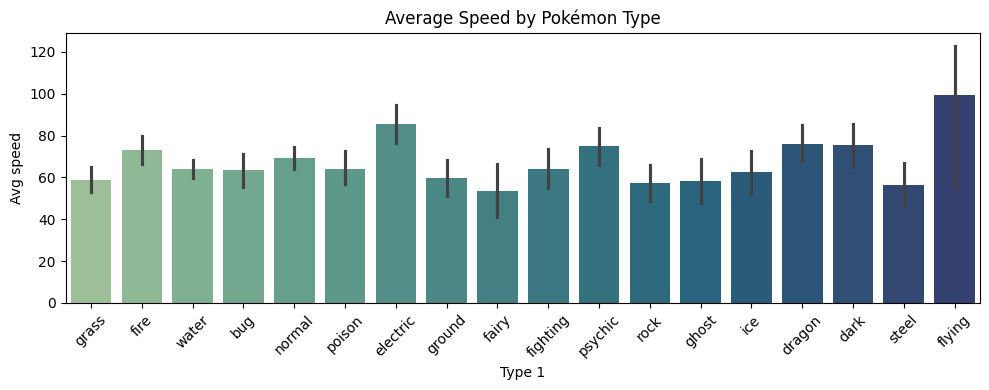

In [56]:
for stat in base_stats:
    plt.figure(figsize=(10, 4))
    sns.barplot(data=df, x="type1", y=stat, estimator="mean", palette="crest", legend=False, hue="type1")
    plt.title(f"Average {stat.capitalize()} by Pokémon Type")
    plt.xticks(rotation=45)
    plt.ylabel(f"Avg {stat}")
    plt.xlabel("Type 1")
    plt.tight_layout()
    plt.show()

###🧬 Top Types by Base Stat

In [60]:
base_stats = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]

avg_stats_by_type = df.groupby("type1")[base_stats].mean()

best_types = avg_stats_by_type.idxmax()
best_values = avg_stats_by_type.max()

best_stats_summary = pd.DataFrame({
    "Best Type": best_types,
    "Average Value": best_values.round(2)
})

best_stats_summary

,Best Type,Average Value
hp,dragon,79.85
attack,dragon,106.41
defense,steel,120.21
sp_attack,psychic,92.60
sp_defense,fairy,87.78
speed,flying,99.67


###🧠 Summary


This analysis shows the average base stat for each primary Pokémon type (`type1`), revealing how different types specialize in different areas:

- **Attack**: Dragon types lead with the highest offensive strength
- **Speed**: Flying types are the fastest on average
- **Defense**: Steel types are the most resilient physically
- **HP**: Dragon types also top average HP, showing both power and bulk
- **Sp. Attack**: Psychic types dominate in special offense
- **Sp. Defense**: Fairy types stand out in special durability

These patterns align with type design philosophy and hint at the battle roles different types naturally fulfill.


#🦾 12. Stat Contribution to Total Strength

In [65]:
base_stats = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]

for stat in base_stats:
    df[f"{stat}_contrib"] = df[stat] / df["base_total"]

avg_contrib = df[[f"{stat}_contrib" for stat in base_stats]].mean().sort_values(ascending=False)

avg_contrib_df = pd.DataFrame({
    "Stat": [stat.replace("_contrib", "") for stat in avg_contrib.index],
    "Average Contribution": avg_contrib.values.round(4)
})

avg_contrib_df.reset_index(drop=True, inplace=True)
avg_contrib_df

,Stat,Average Contribution
0,attack,0.1805
1,defense,0.1708
2,sp_defense,0.1651
3,sp_attack,0.1639
4,hp,0.1629
5,speed,0.1569


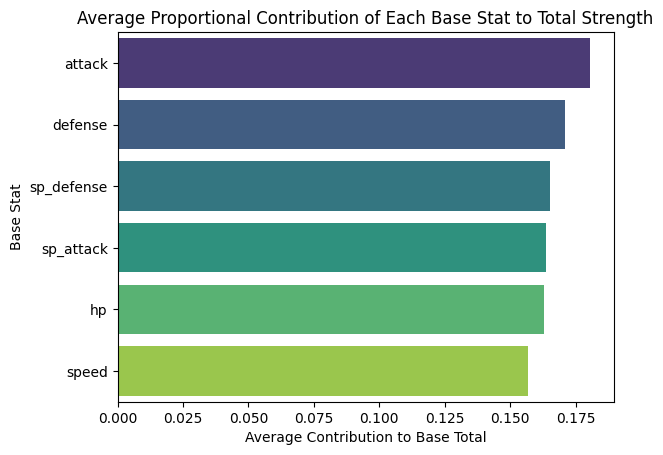

In [68]:
sns.barplot(data=avg_contrib_df, x="Average Contribution", y="Stat", palette="viridis", legend=False, hue="Stat")
plt.title("Average Proportional Contribution of Each Base Stat to Total Strength")
plt.xlabel("Average Contribution to Base Total")
plt.ylabel("Base Stat")
plt.show()